In [ ]:
import pandas as pd

from utils.plot_signals import plot_all_signals
from utils.plotting import (plot_signals_with_errors, plot_acf, plot_indices_4_schemes, plot_hyperparameter_combined, plot_cv_reliability,
                            plot_cv_reliability_comparison_grid)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


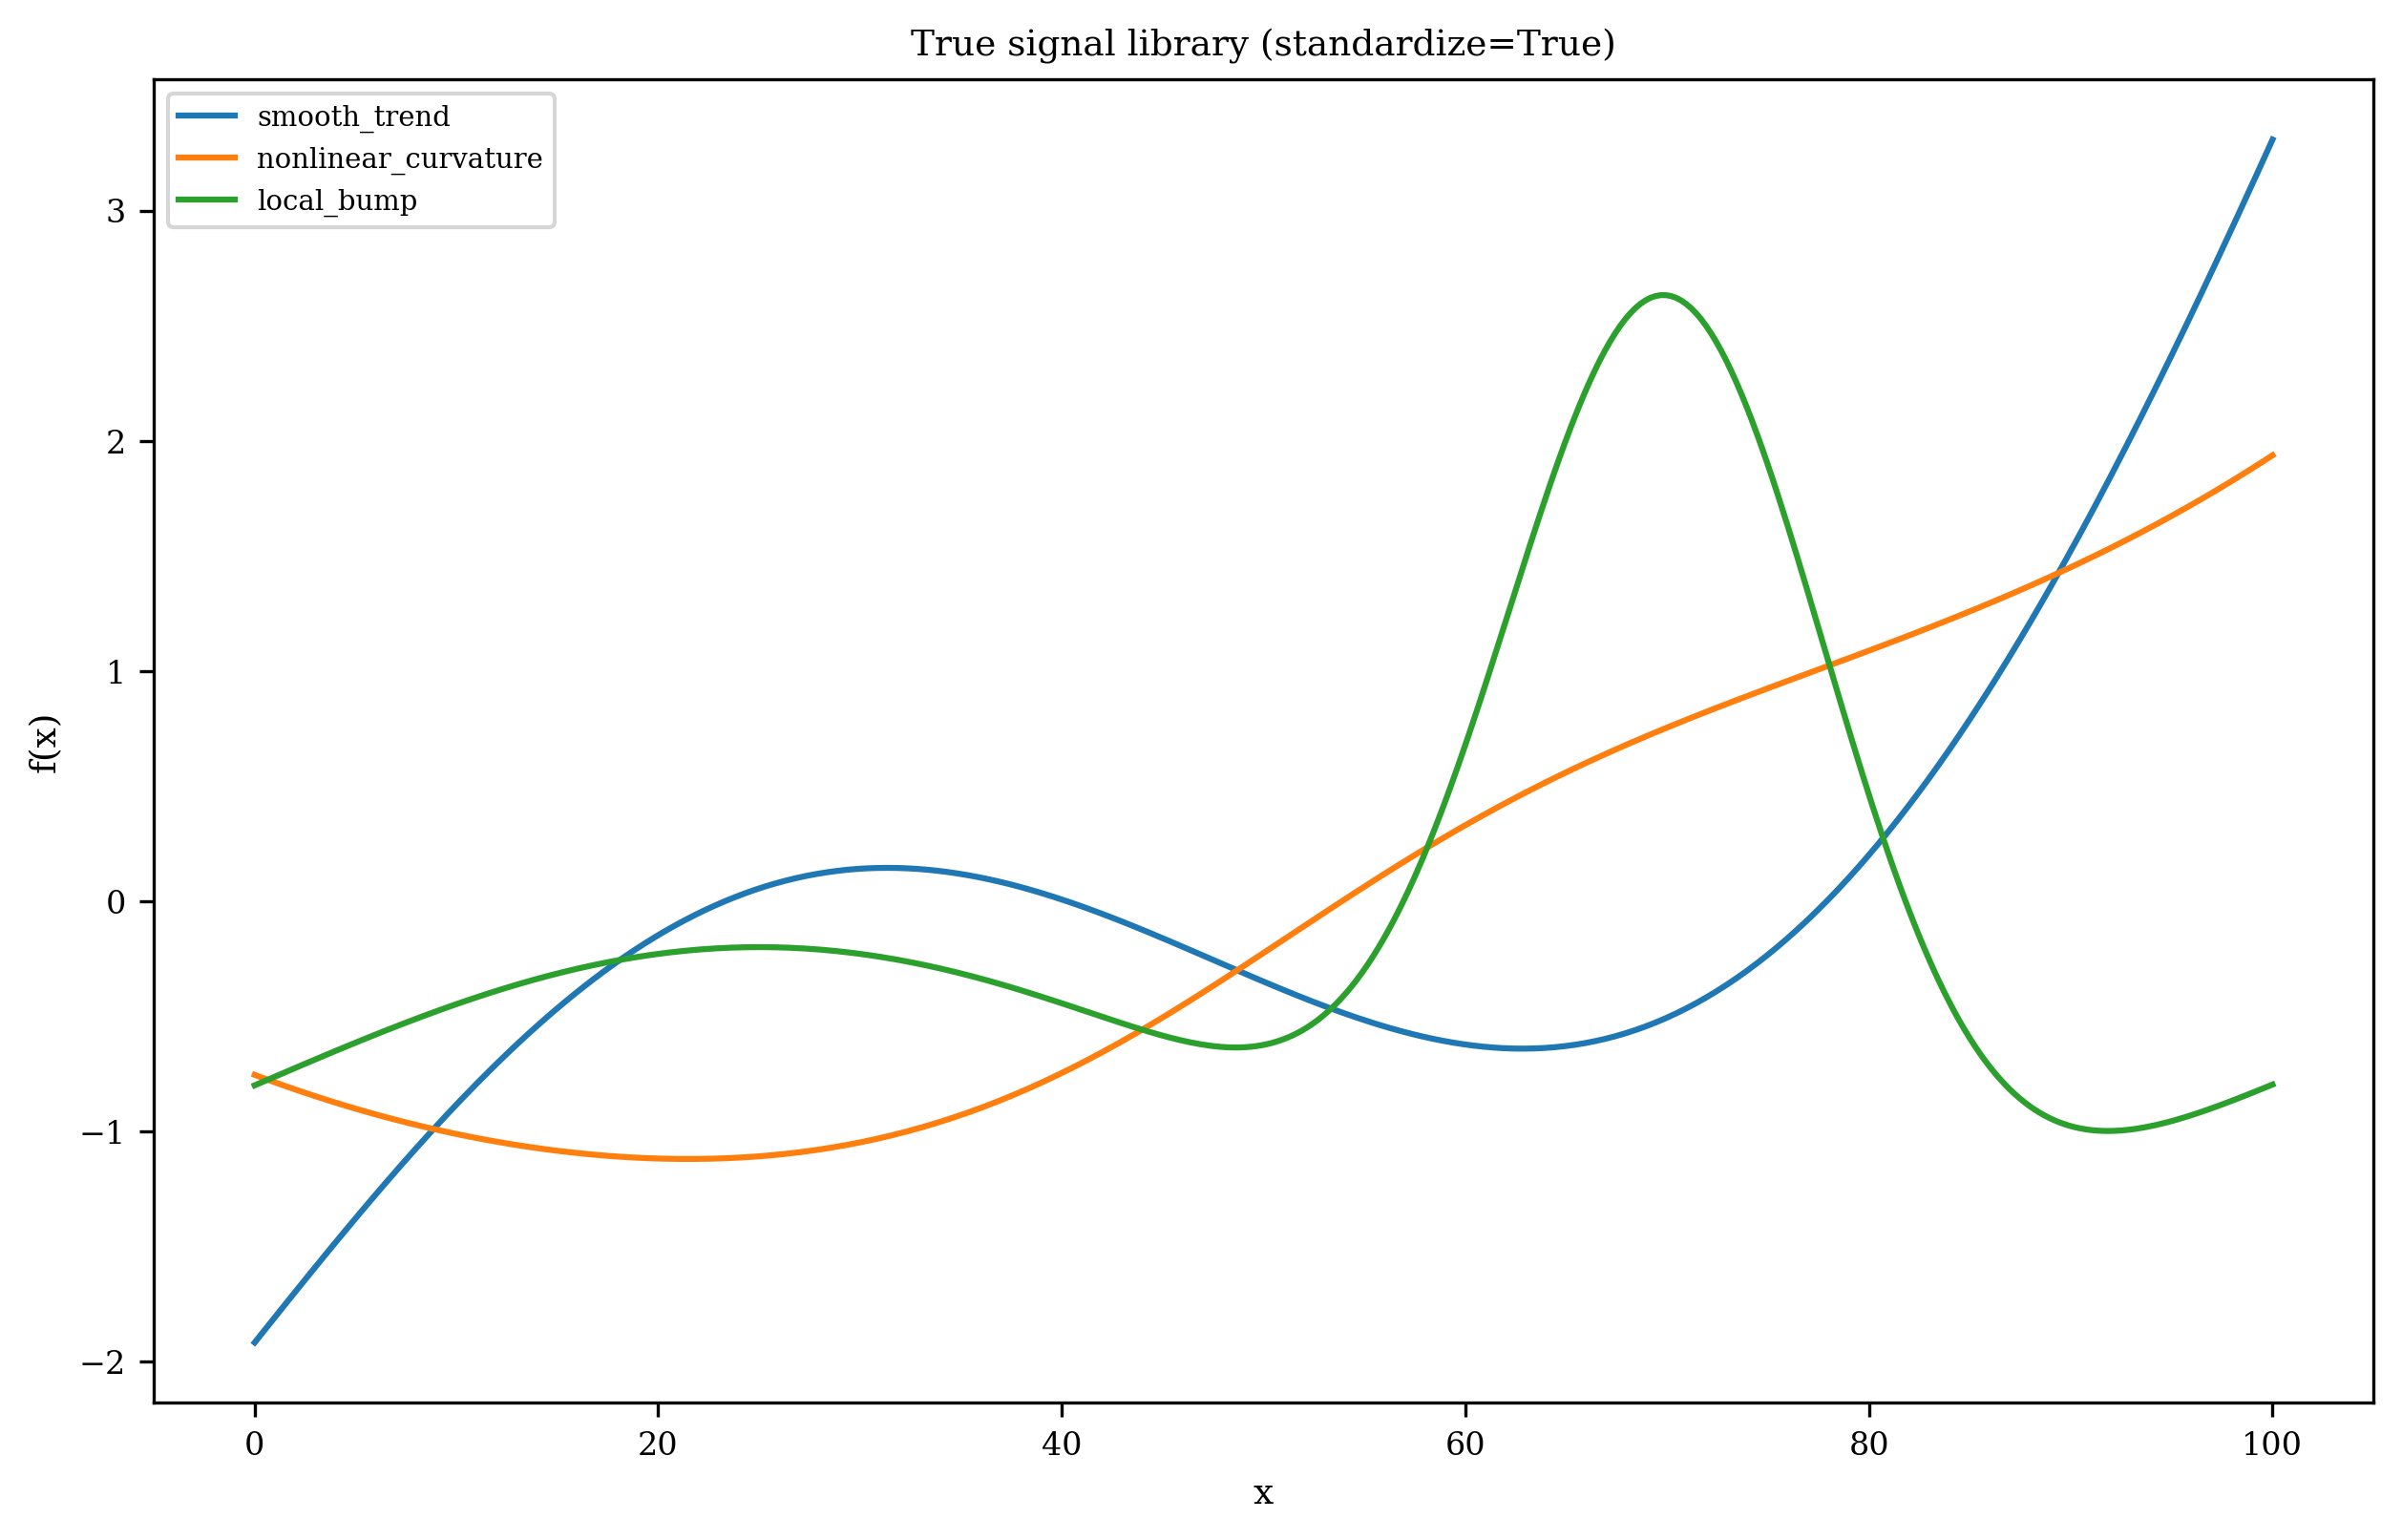

In [64]:
plot_all_signals(n=400, x_start=0.0, x_end=100.0, standardize=True, show=True)

In [65]:
noise_params = {
    "ar1": {"rho": 0.7, "sigma": 0.3},
    "ma5": {"theta": 0.7, "sigma": 0.3},
    "arima": {"p": 2, "d": 0, "q": 10, "sigma": 0.45},
    "seasonal_ar": {"season_period": 75, "rho1": 0.4, "rhoS": 0.7, "sigma": 0.3}
}

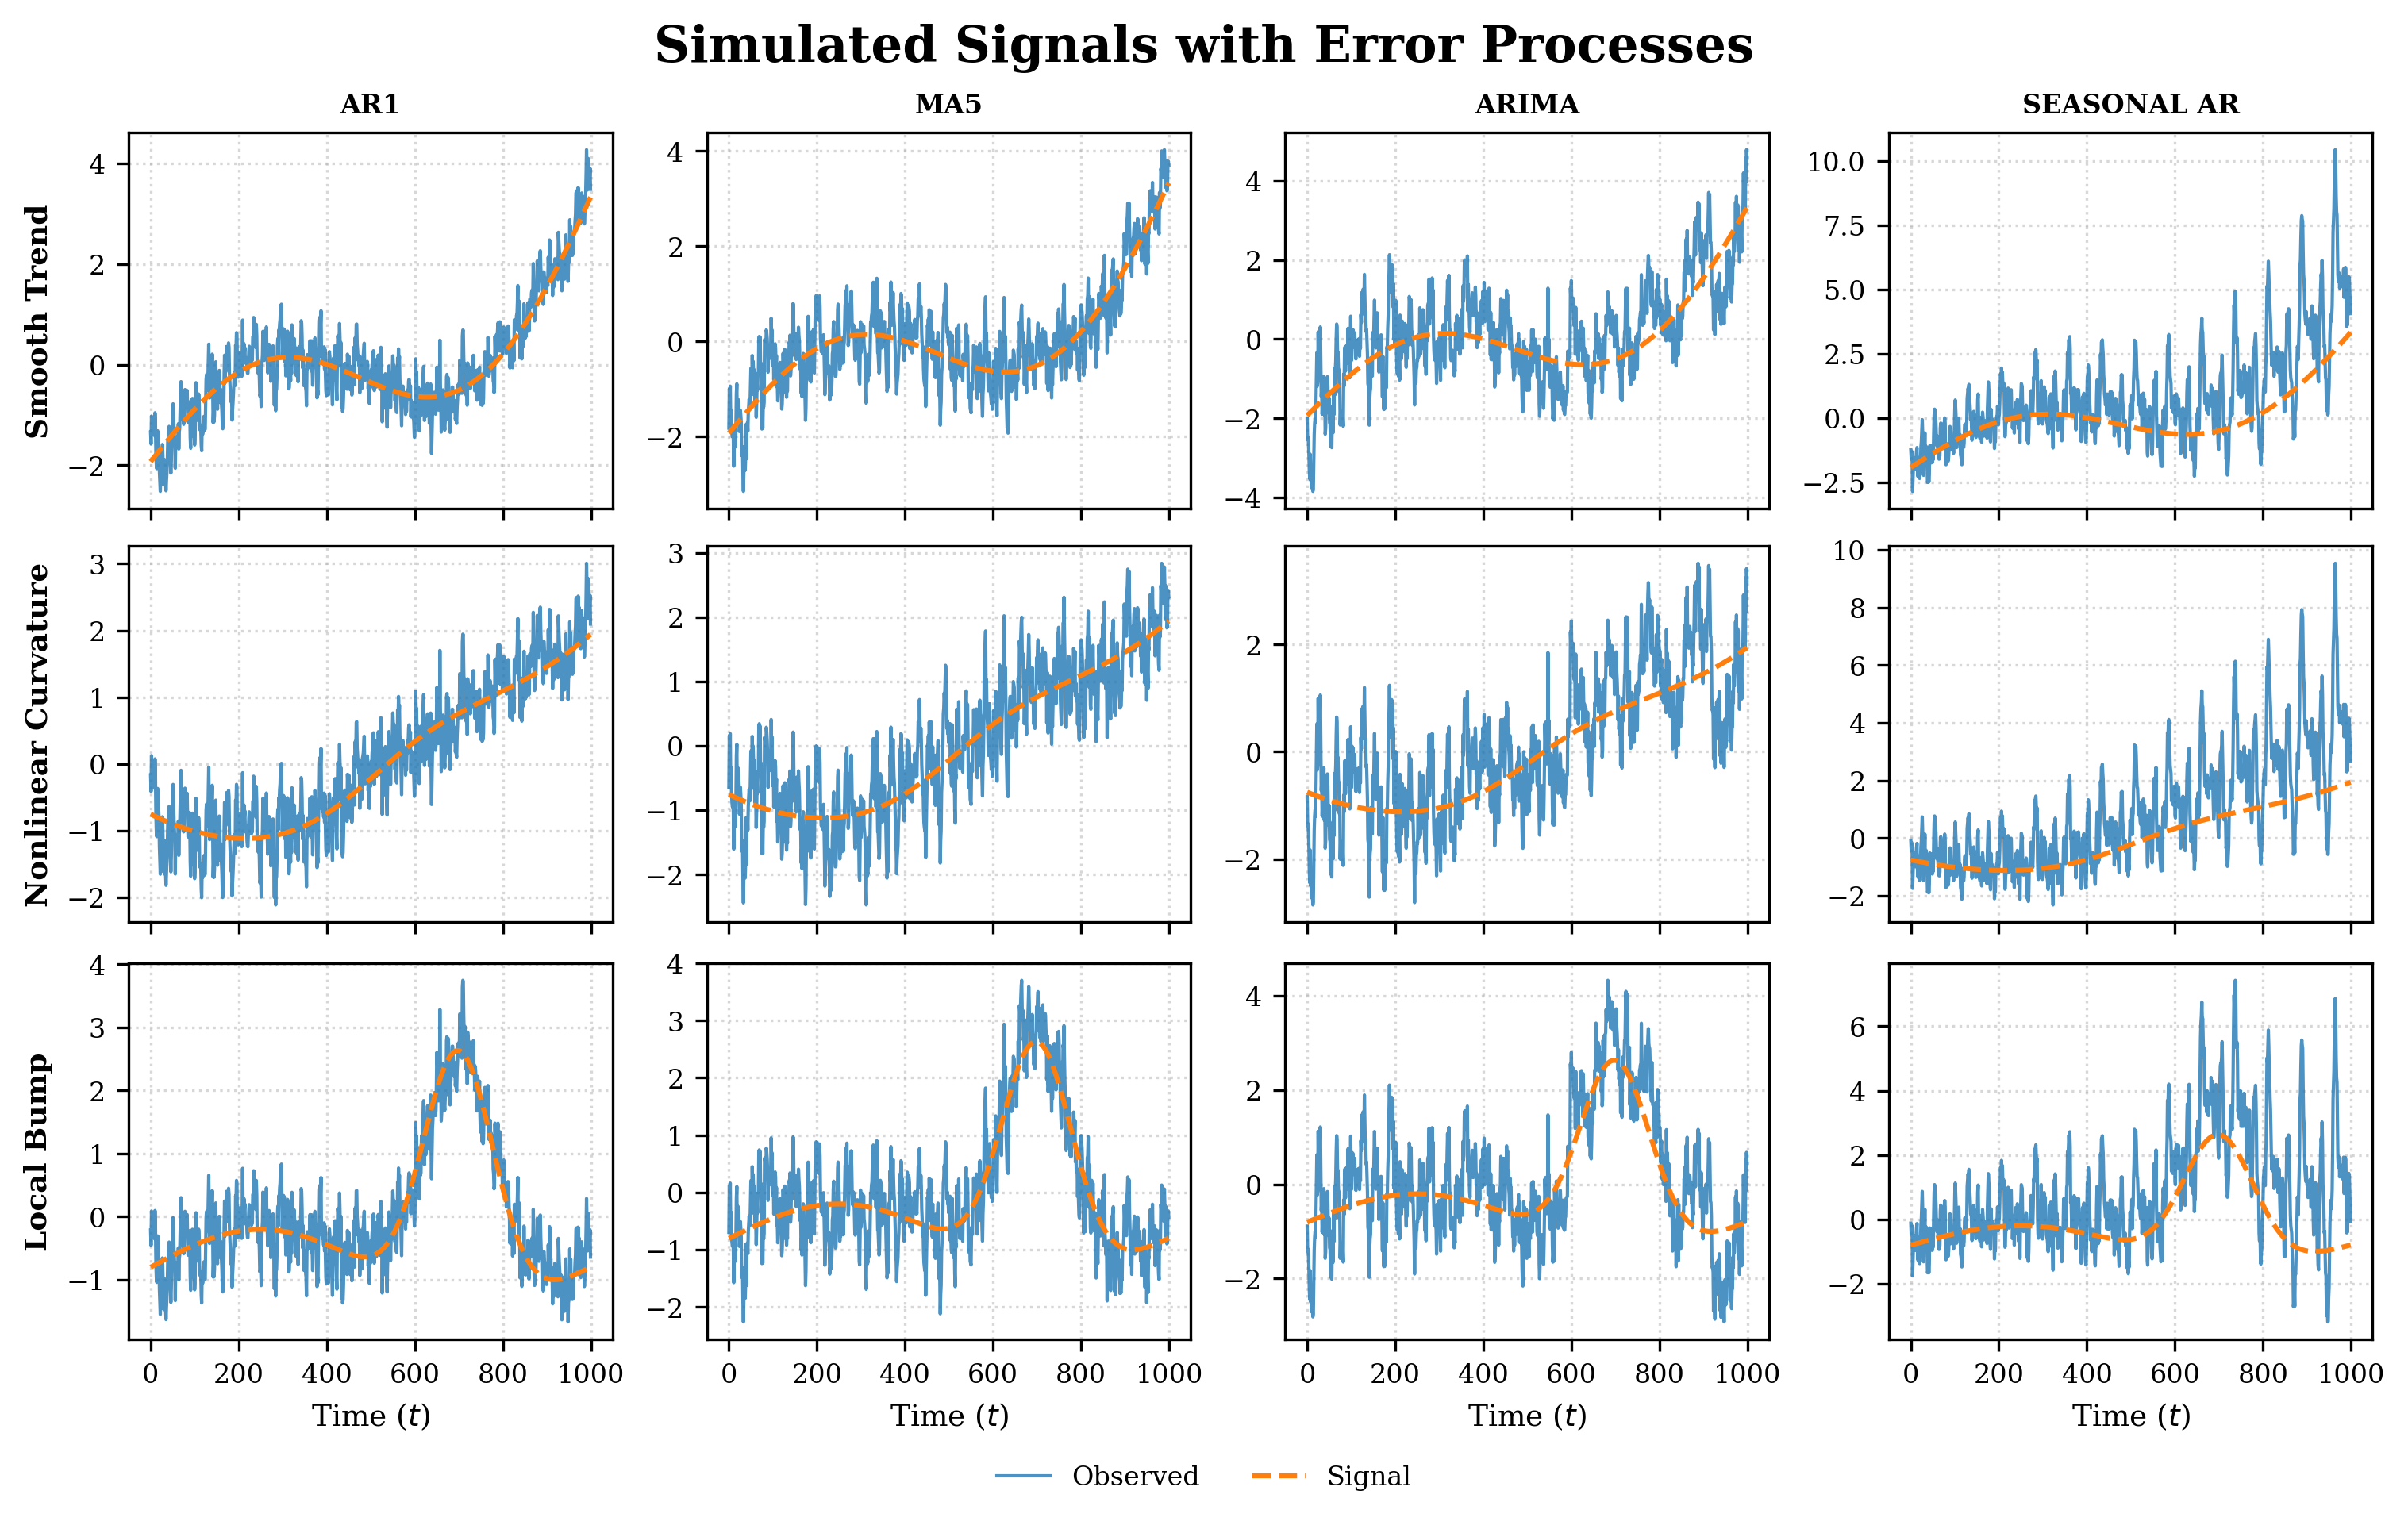

In [66]:
n = 1000
plot_signals_with_errors(n, noise_params)

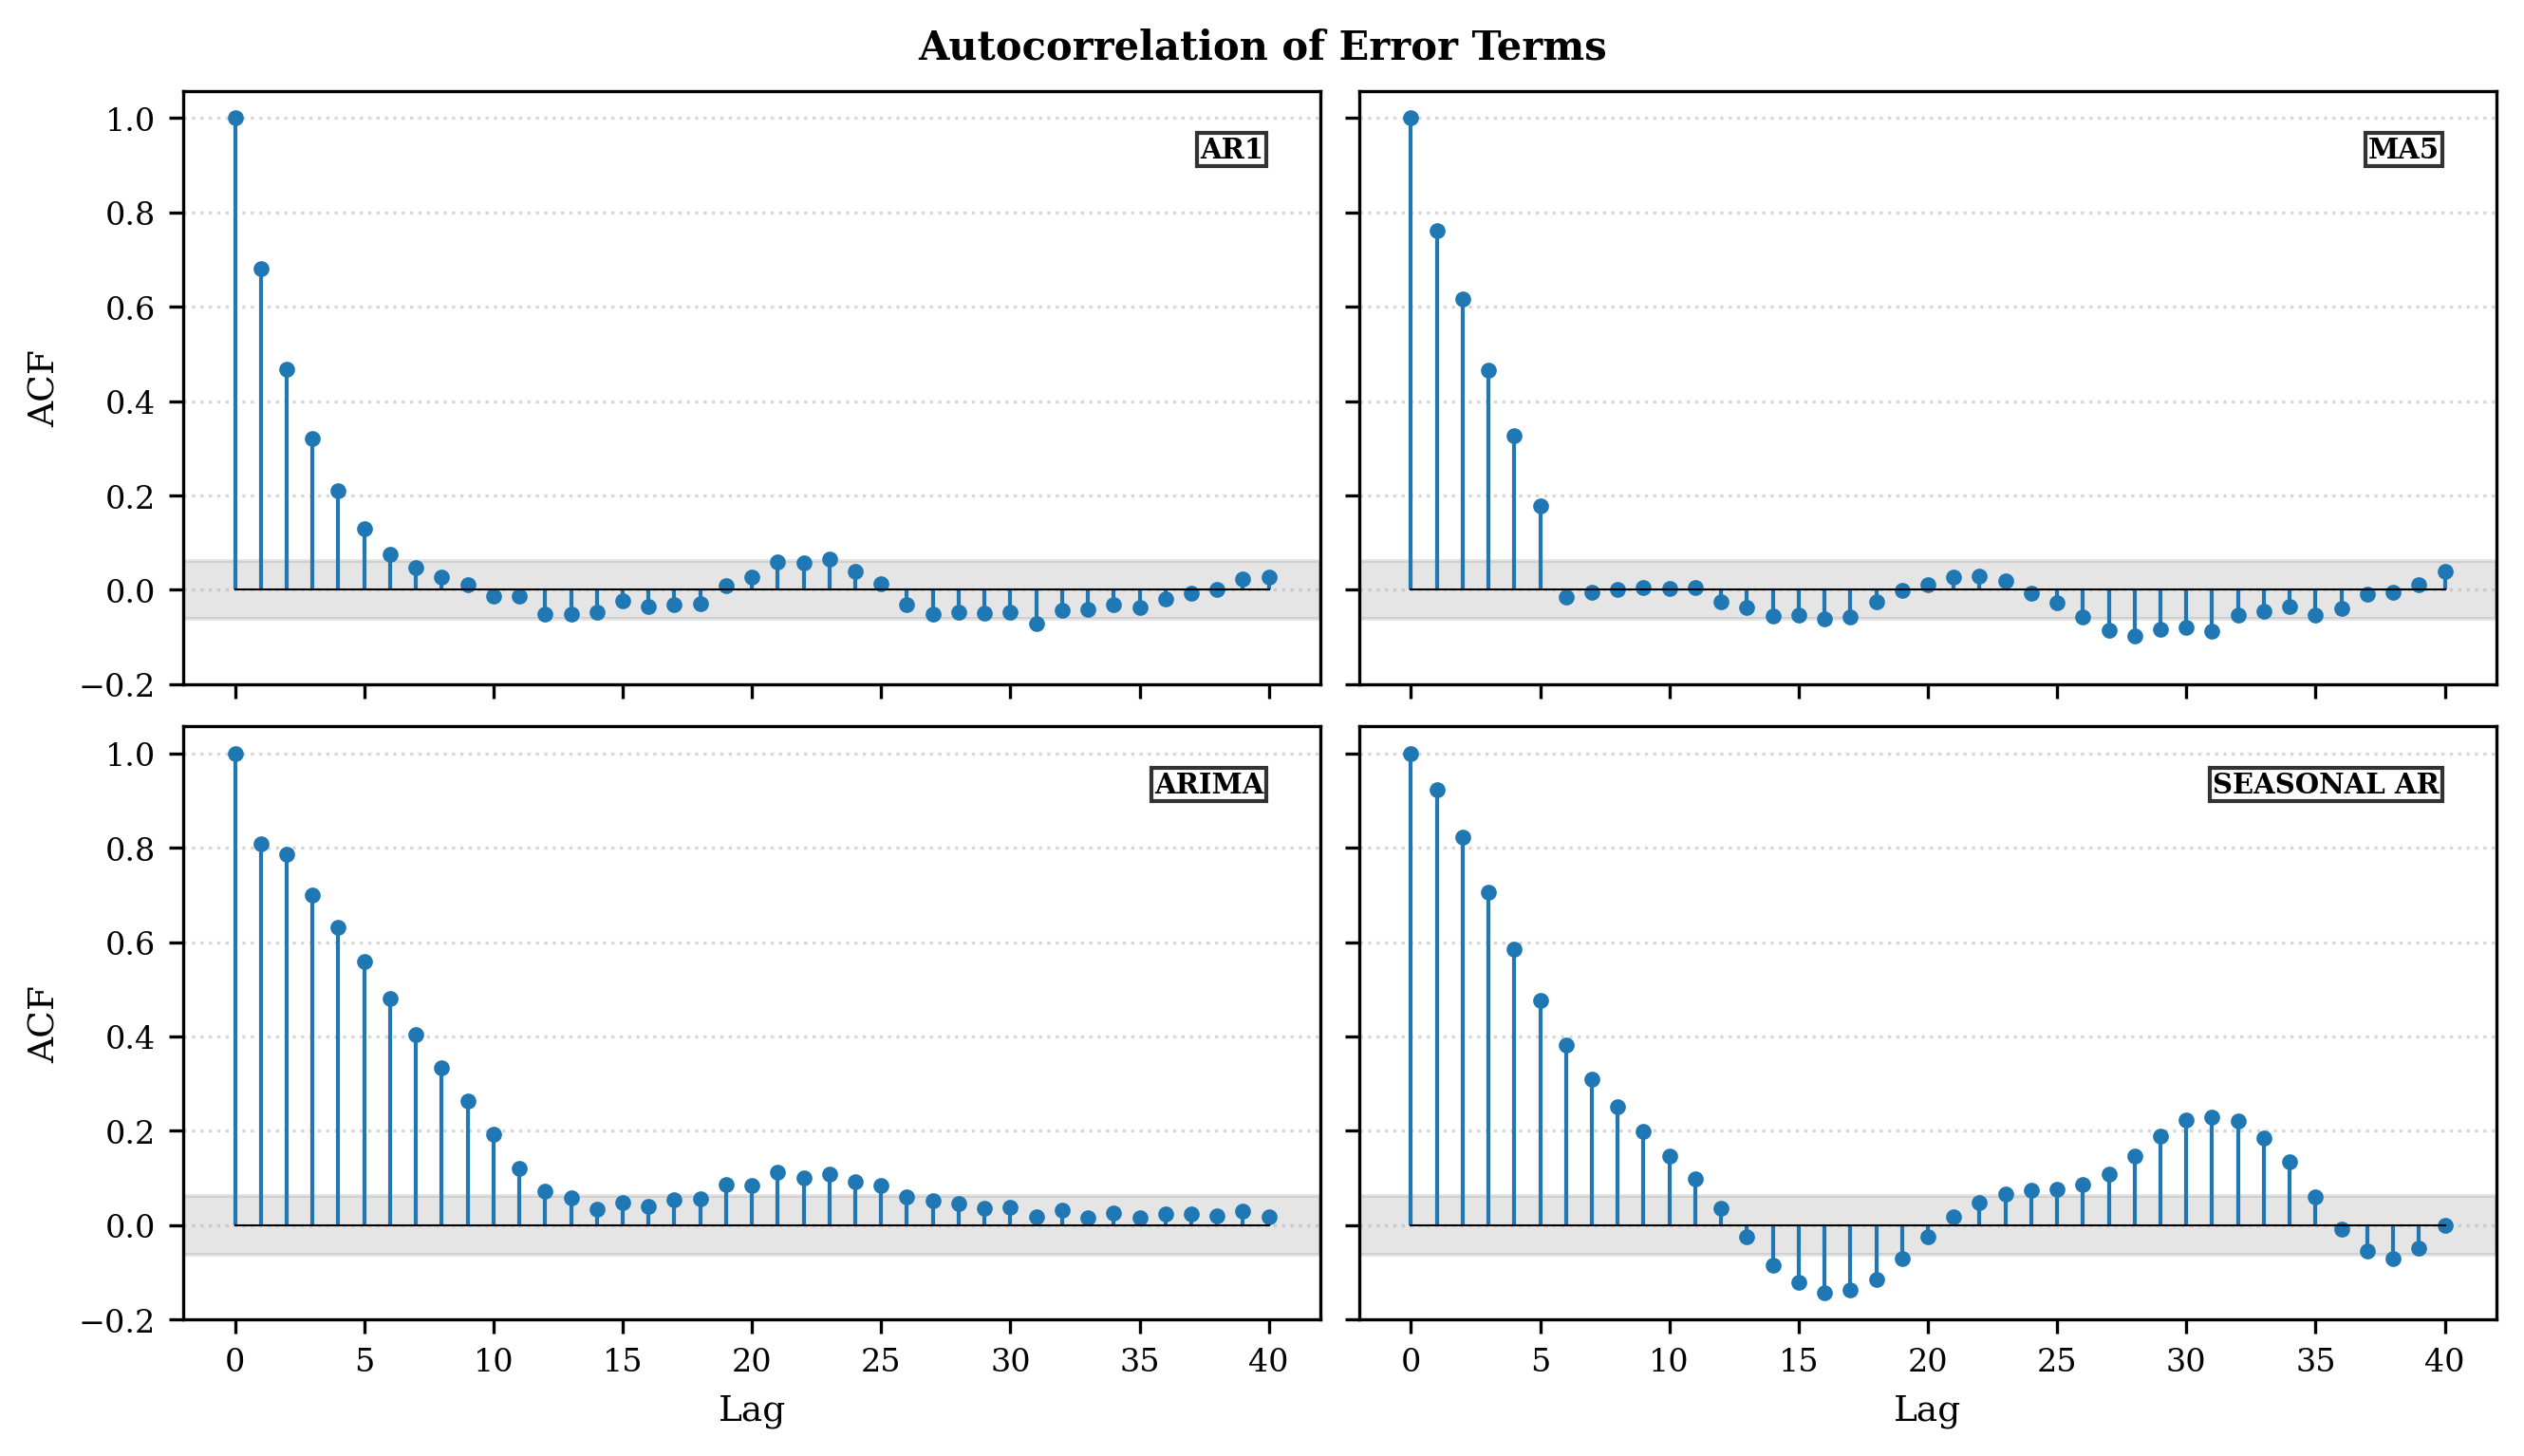

In [67]:
n_acf = 400

plot_acf(n, noise_params)

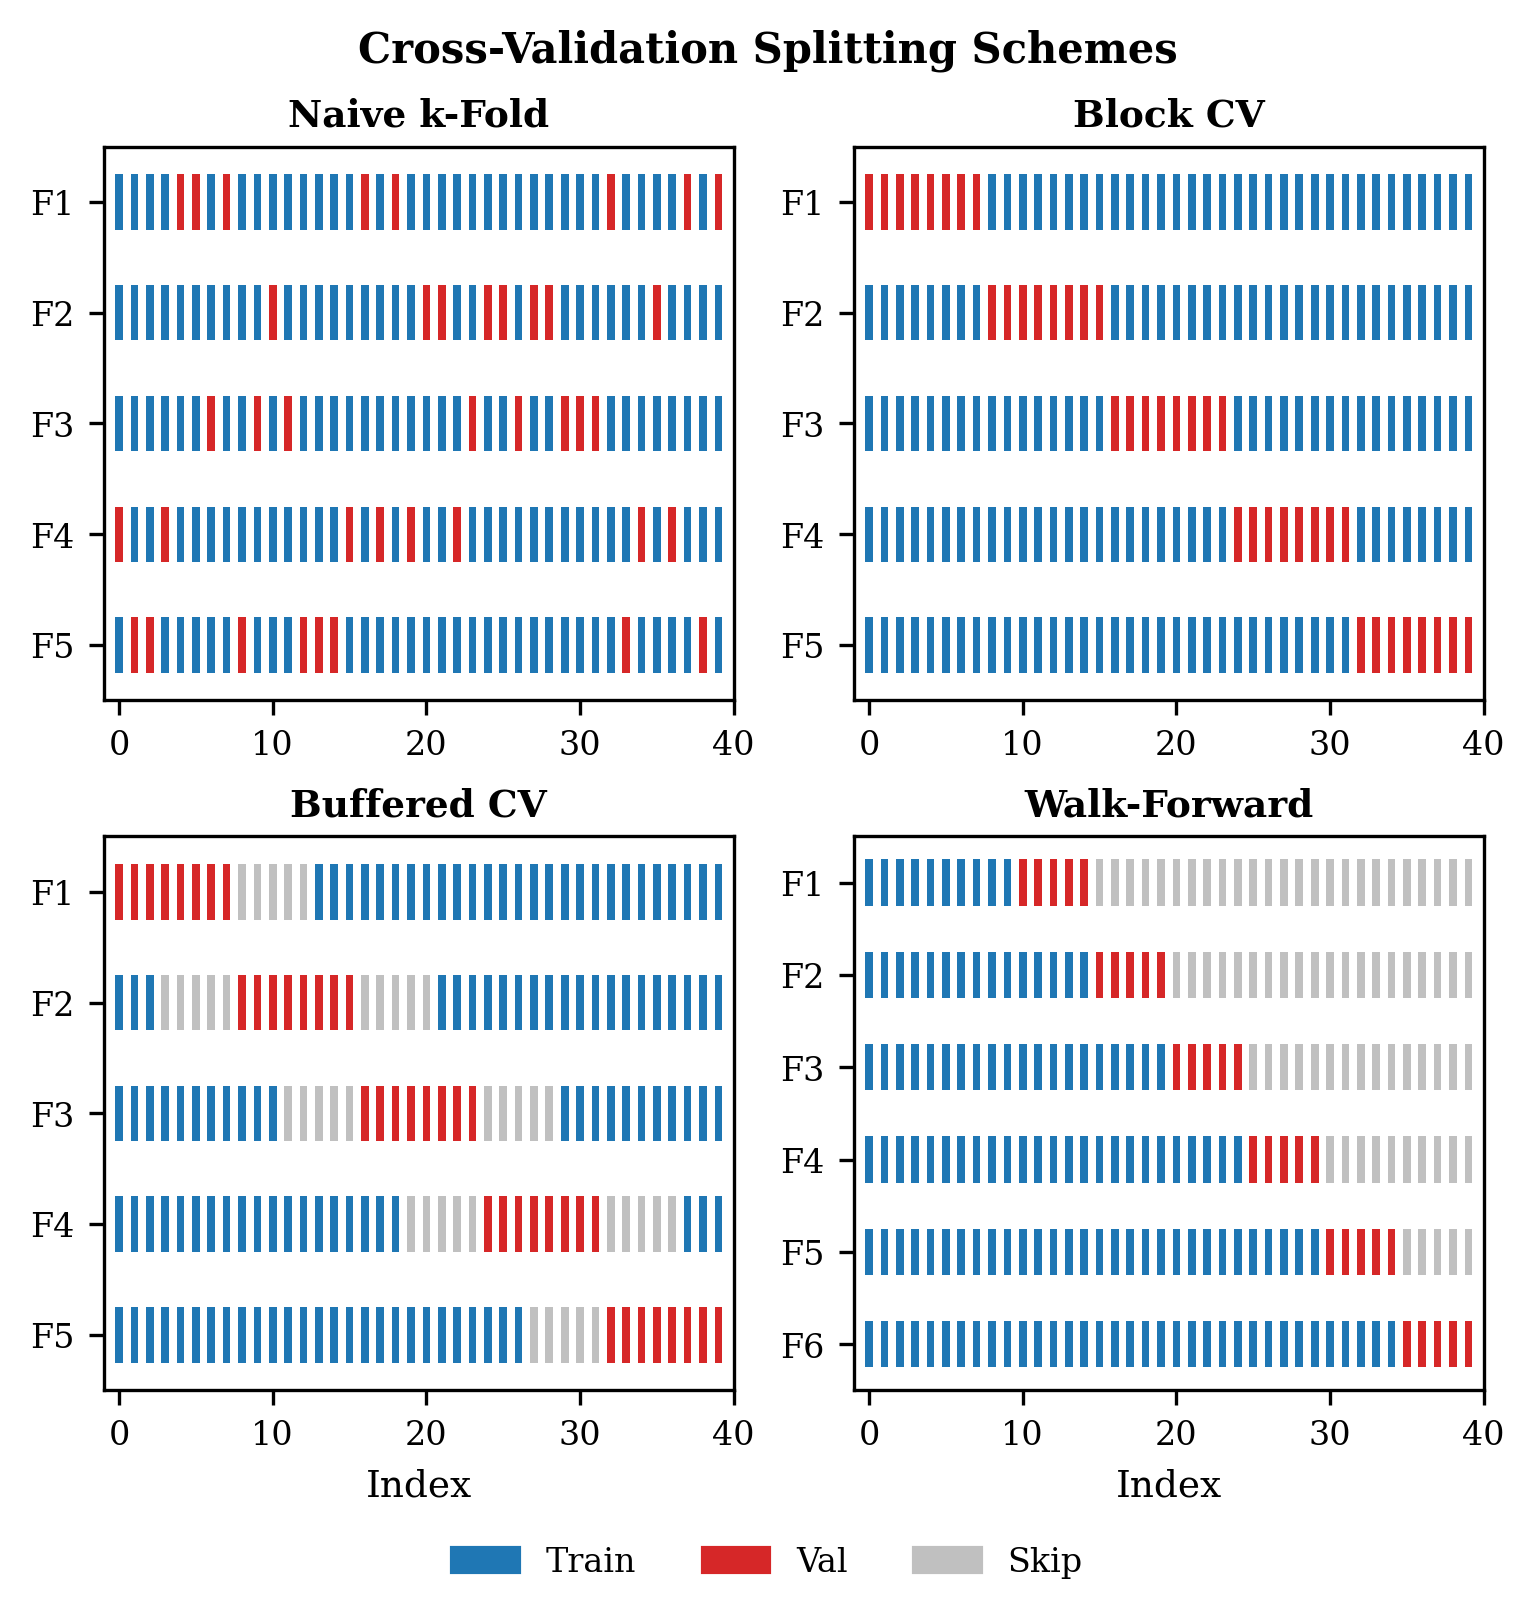

In [68]:
N_SAMPLES = 40

plot_indices_4_schemes(N_SAMPLES)

# Test

In [69]:
df_error_kernel = pd.read_csv('runs/non_linear_AR1_runs/kernel_model_error.csv')
df_error_spline = pd.read_csv('runs/non_linear_AR1_runs/spline_model_error.csv')
df_error_xgboost = pd.read_csv('runs/non_linear_AR1_runs/xgb_model_error.csv')


scheme_map = {
    'naive': 'Naive',
    'block': 'Block',
    'block_buffered': 'Buffered',
    'walk_forward': 'Walk Forward'
}
df_error_kernel['cv_scheme_display'] = df_error_kernel['cv_scheme'].map(scheme_map)
df_error_spline['cv_scheme_display'] = df_error_spline['cv_scheme'].map(scheme_map)
df_error_xgboost['cv_scheme_display'] = df_error_xgboost['cv_scheme'].map(scheme_map)

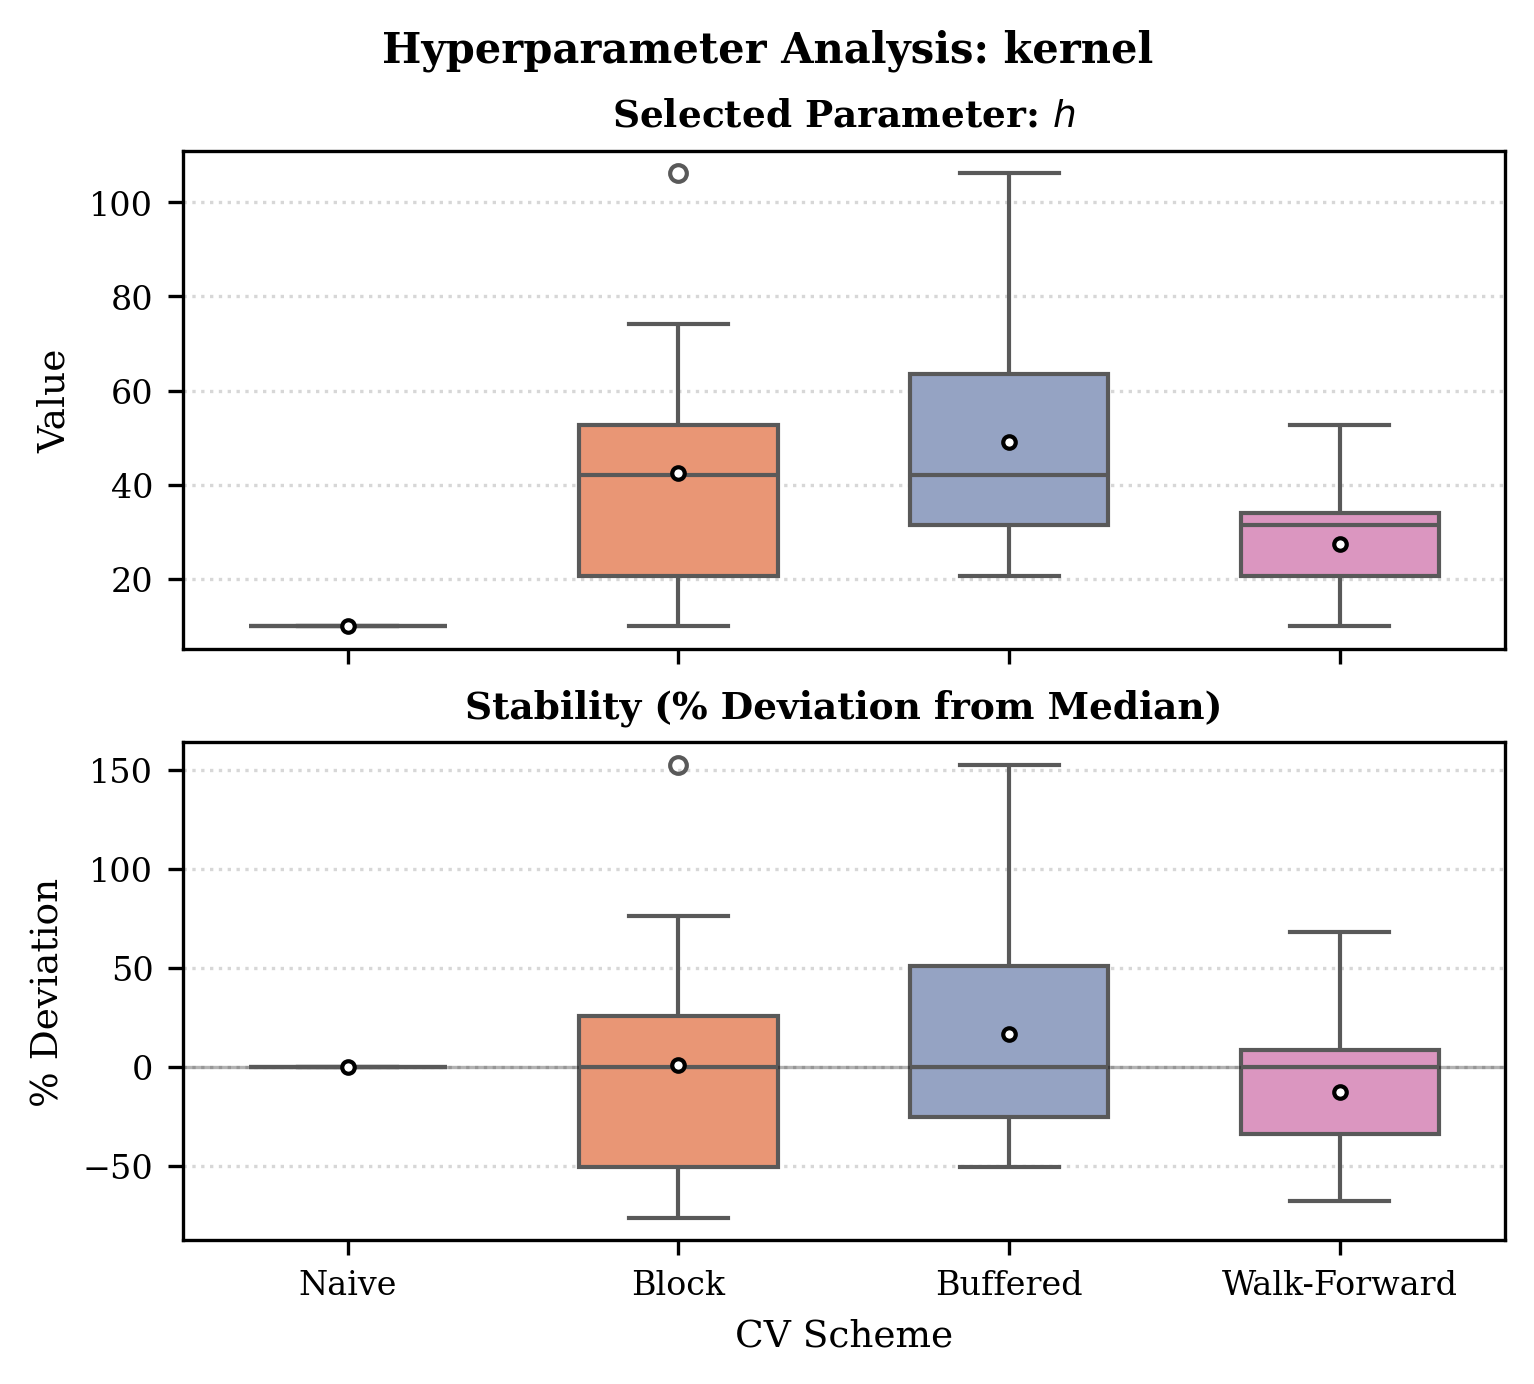

In [70]:
plot_hyperparameter_combined(df_error_kernel,model_name="kernel")

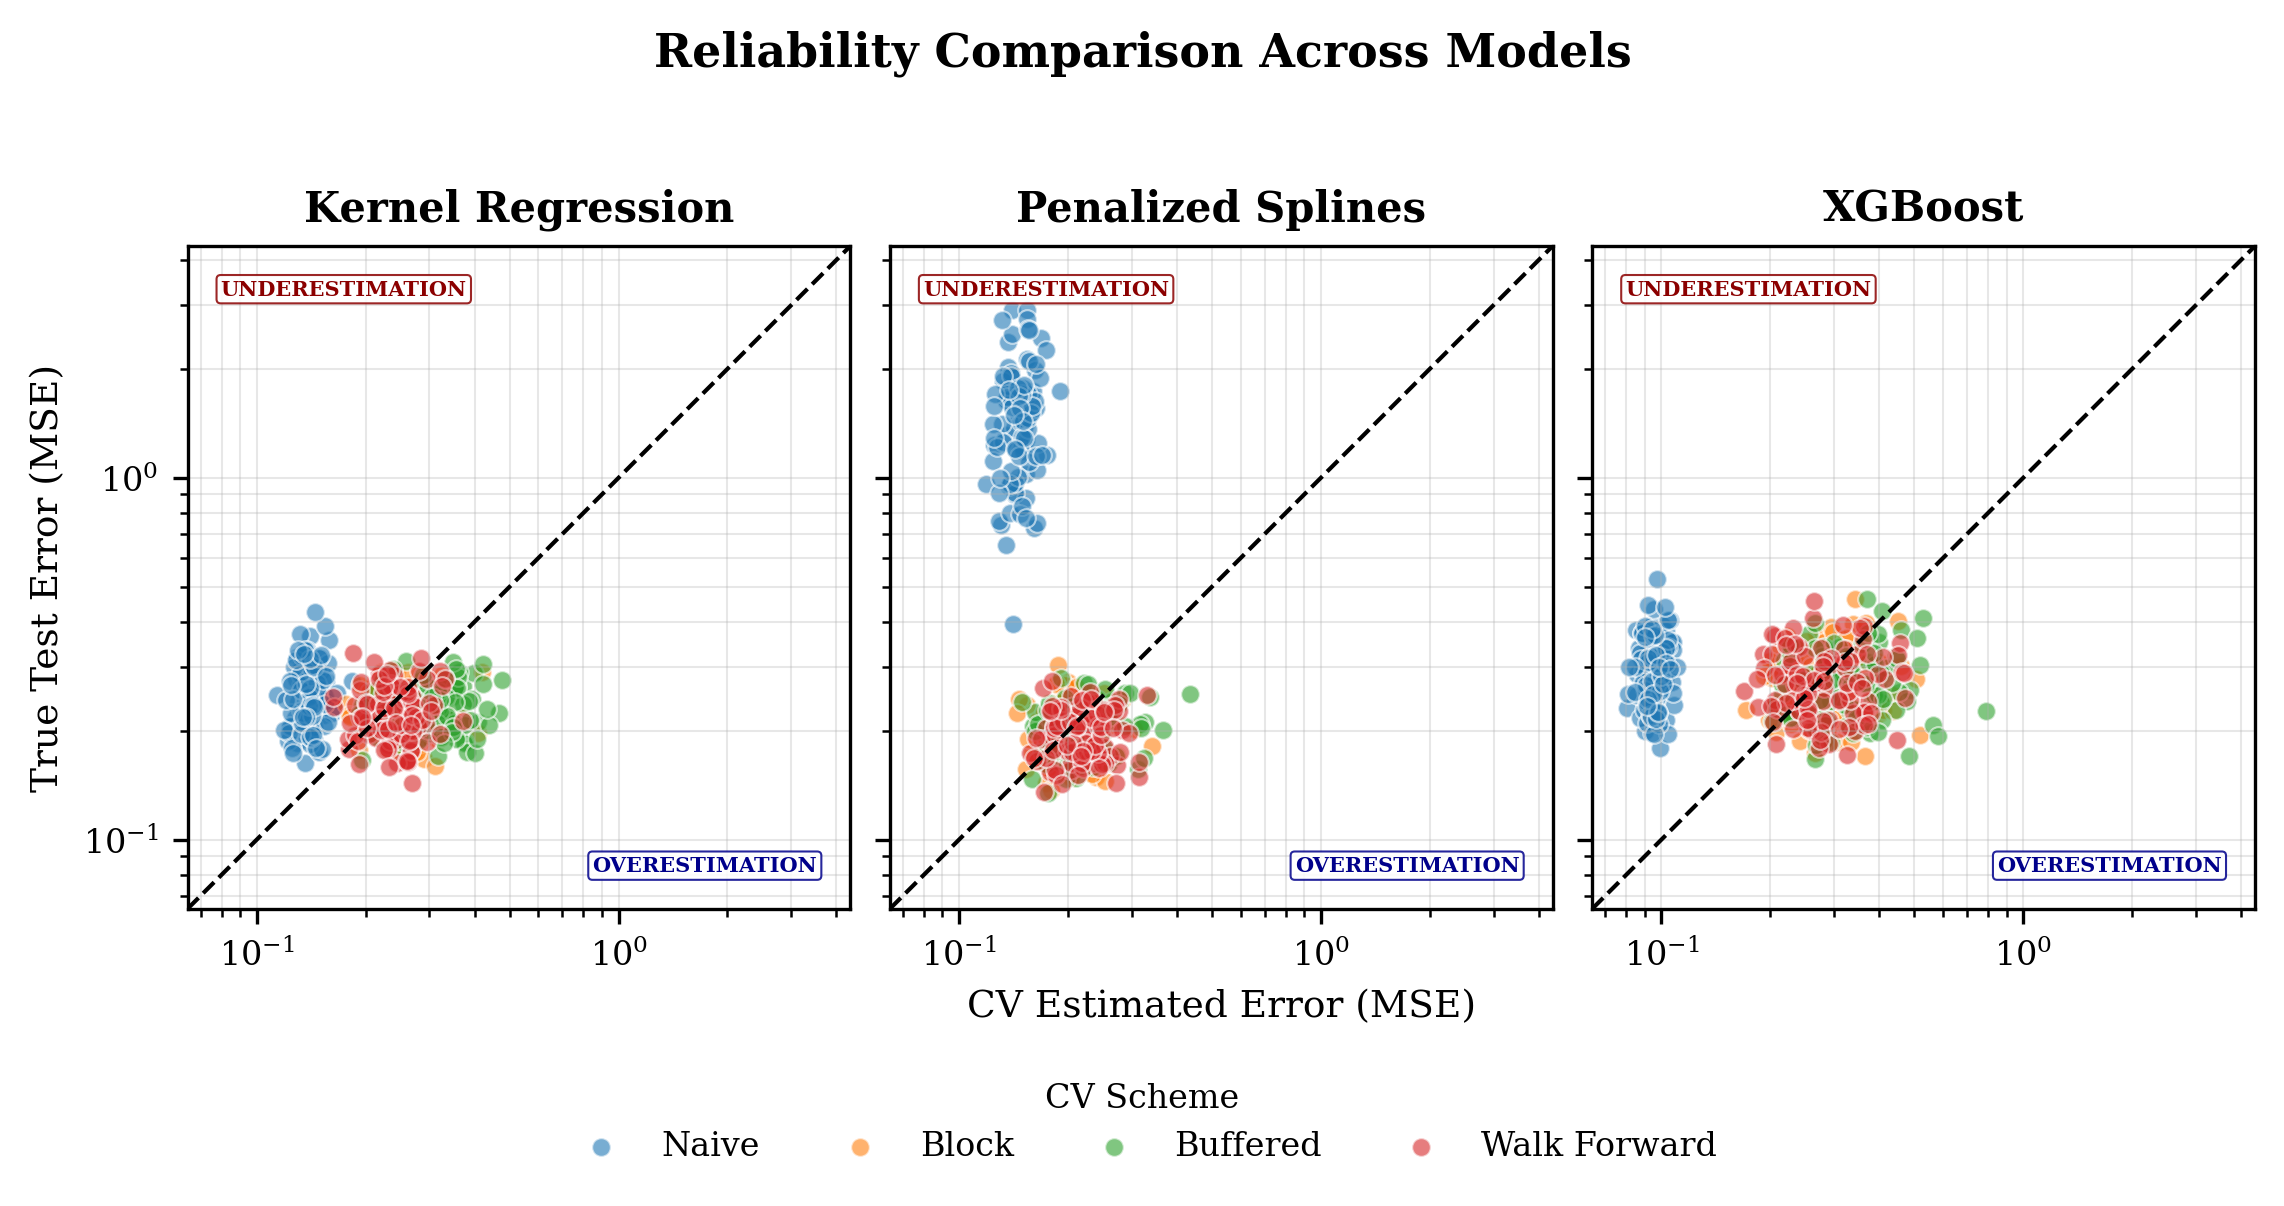

In [71]:
plot_cv_reliability(df_error_kernel, df_error_spline, df_error_xgboost)

In [26]:
df_error_kernel_5 = pd.read_csv('runs/ARIMA_5/kernel_model_error.csv')
df_error_spline_5 = pd.read_csv('runs/ARIMA_5/spline_model_error.csv')
df_error_xgboost_5 = pd.read_csv('runs/ARIMA_5/xgb_model_error.csv')

df_error_kernel_5['cv_scheme_display'] = df_error_kernel_5['cv_scheme'].map(scheme_map)
df_error_spline_5['cv_scheme_display'] = df_error_spline_5['cv_scheme'].map(scheme_map)
df_error_xgboost_5['cv_scheme_display'] = df_error_xgboost_5['cv_scheme'].map(scheme_map)

In [27]:
df_error_kernel_20 = pd.read_csv('runs/ARIMA_20/kernel_model_error.csv')
df_error_spline_20 = pd.read_csv('runs/ARIMA_20/spline_model_error.csv')
df_error_xgboost_20 = pd.read_csv('runs/ARIMA_20/xgb_model_error.csv')

df_error_kernel_20['cv_scheme_display'] = df_error_kernel_20['cv_scheme'].map(scheme_map)
df_error_spline_20['cv_scheme_display'] = df_error_spline_20['cv_scheme'].map(scheme_map)
df_error_xgboost_20['cv_scheme_display'] = df_error_xgboost_20['cv_scheme'].map(scheme_map)

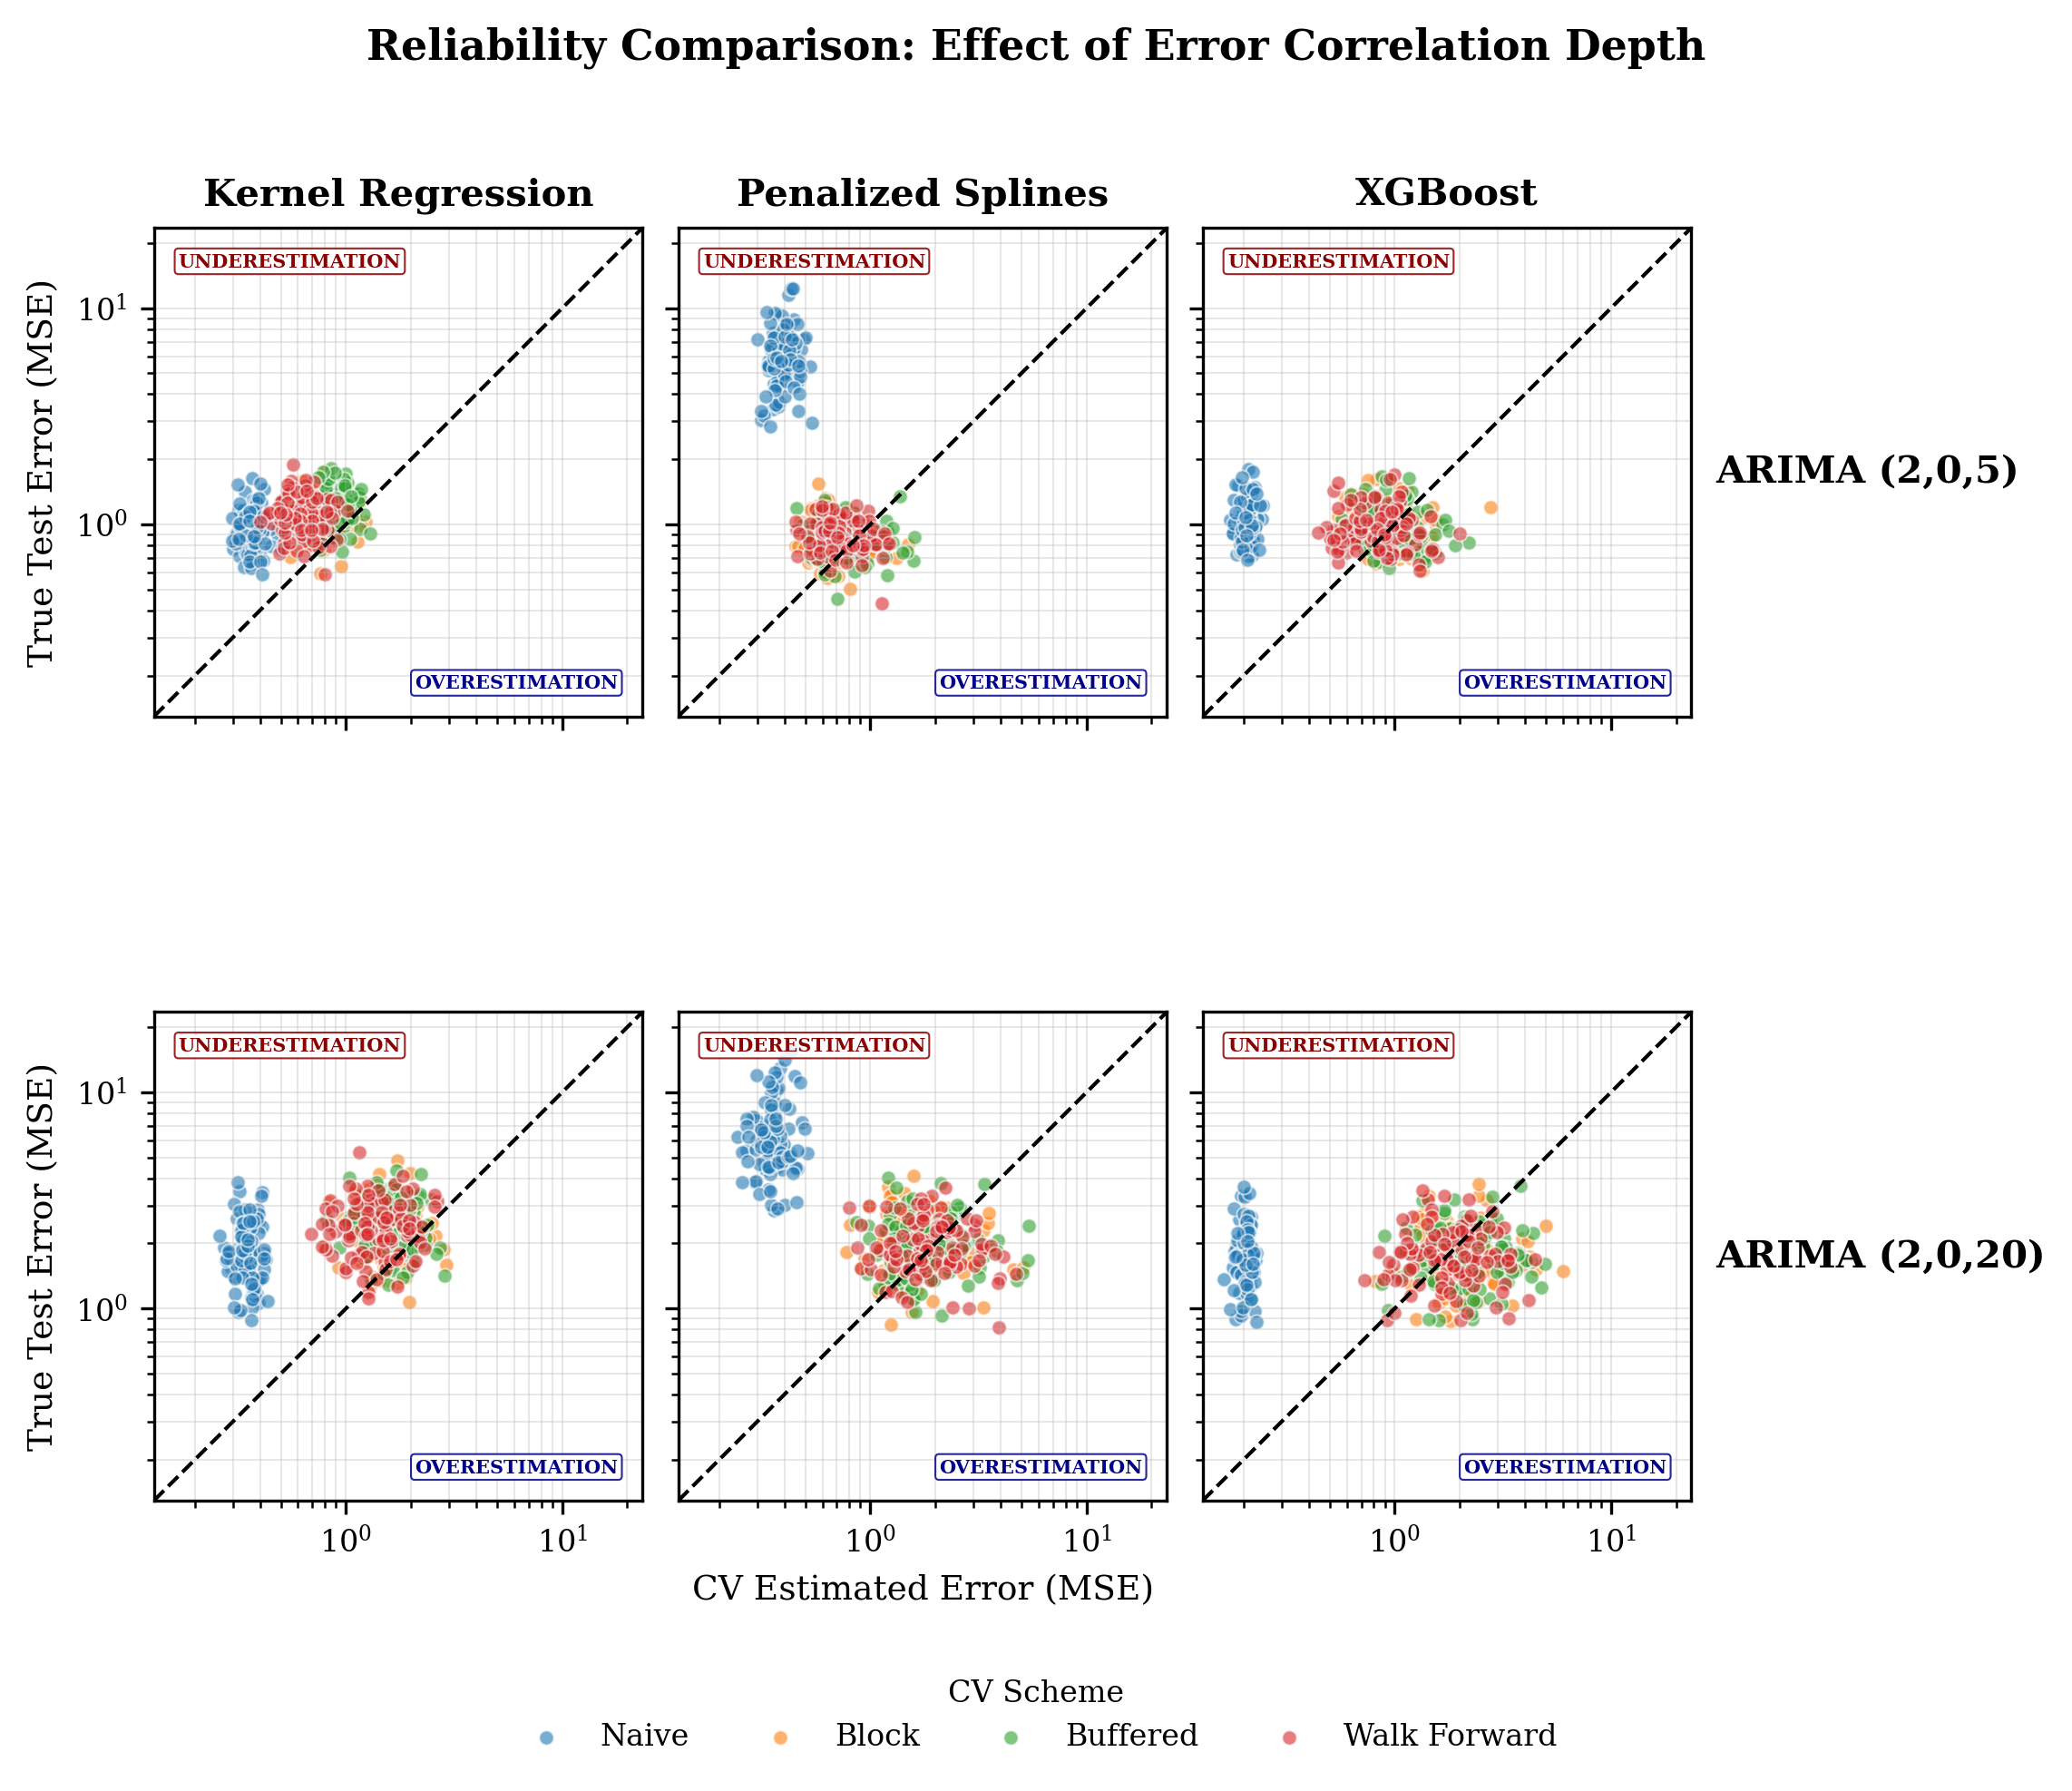

In [28]:
plot_cv_reliability_comparison_grid(df_error_kernel_5, df_error_spline_5, df_error_xgboost_5,
                                    df_error_kernel_20, df_error_spline_20, df_error_xgboost_20)